In [9]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#-----------------Mätning1------------------------------------
Spänning1_1_file = r'./Mätningar/Ångström_1/Spänning1.csv'
Spänning1_2_file = r'./Mätningar/Ångström_1/Spänning2.csv'
Temperatur1_1_file = r'./Mätningar/Ångström_1/Temperatur1.csv'
Temperatur1_2_file = r'./Mätningar/Ångström_1/Temperatur2.csv'
#-----------------Mätning2------------------------------------
Spänning2_1_file = r'./Mätningar/Ångström_2/Spänning1.csv'
Spänning2_2_file = r'./Mätningar/Ångström_2/Spänning2.csv'
Temperatur2_1_file = r'./Mätningar/Ångström_2/Temperatur1.csv'
Temperatur2_2_file = r'./Mätningar/Ångström_2/Temperatur2.csv'
#-----------------Mätning2------------------------------------
Spänning3_1_file = r'./Mätningar/Ångström_3/Spänning1.csv'
Spänning3_2_file = r'./Mätningar/Ångström_3/Spänning2.csv'
Temperatur3_1_file = r'./Mätningar/Ångström_3/Temperatur1.csv'
Temperatur3_2_file = r'./Mätningar/Ångström_3/Temperatur2.csv'

In [10]:
class Data:

    def __init__(self, data, Mätintervall, Startindex):
        self.startind = Startindex
        self.datadict = {}
        self.datadict['Time'] = []
        self.datadict['Amplitude'] = []
        self.matint = Mätintervall
        with open(data, 'r', encoding='utf-8') as file:
            for row in file:
                if row[0].isnumeric():
                    r = row.split(';')
                    self.datadict['Time'].append(int(r[0])*Mätintervall)
                    self.datadict['Amplitude'].append(float('.'.join(r[1][:-1].split(','))))
        

        return
    def t(self):
        return self.datadict['Time'][self.startind:]
    
    def a(self):
        return self.datadict['Amplitude'][self.startind:]
    
    def get_freq(self):
        x, y = np.array(self.datadict['Time'][2500:]), np.array(self.datadict['Amplitude'][2500:])
        Freq_Amplitudes = np.abs(np.fft.fft(y))
        Freq = np.fft.fftfreq(len(x), x[1]-x[0])
        FFT = {}
        for i in range(len(Freq)):
            FFT[np.abs(Freq_Amplitudes[i])] = Freq[i]
        sorted_list = sorted(FFT.items(), key = lambda x:x[0])
        return FFT[sorted_list[-2][0]]
    
    def get_max_peaks(self):
        peakindice = find_peaks(self.a(), distance=int(0.8/self.get_freq()/self.matint))
        peaks = []
        for index in peakindice[0]:
            peaks.append((self.t()[index] ,self.a()[index]))
        return [peaks, peakindice[0]]
    
    def get_mini_peaks(self):
        peakindice = find_peaks(-np.array(self.a()), distance=int(0.8/self.get_freq()/self.matint))
        peaks = []
        for index in peakindice[0]:
            peaks.append(self.t()[index], self.a()[index])
        return [peaks, peakindice[0]]


#class Measurement:
#    def __init__(self, data1, data2, Mätintervall):
#        self.X1 = Data(data1, Mätintervall)
#        self.X2 = Data(data2, Mätintervall)
    
    


In [14]:
Temperatur1_1 = Data(Temperatur1_1_file, 5, 2500)
#Temperatur1_2 = Data(Temperatur1_2_file, 5)
#Temperatur2_1 = Data(Temperatur2_1_file, 2)
#Temperatur2_2 = Data(Temperatur2_2_file, 2)
#Temperatur3_1 = Data(Temperatur2_1_file, 2)
#Temperatur3_2 = Data(Temperatur2_2_file, 2)

Temperatur1_1.get_max_peaks()[0][0][0]

12915

599.7101449275362


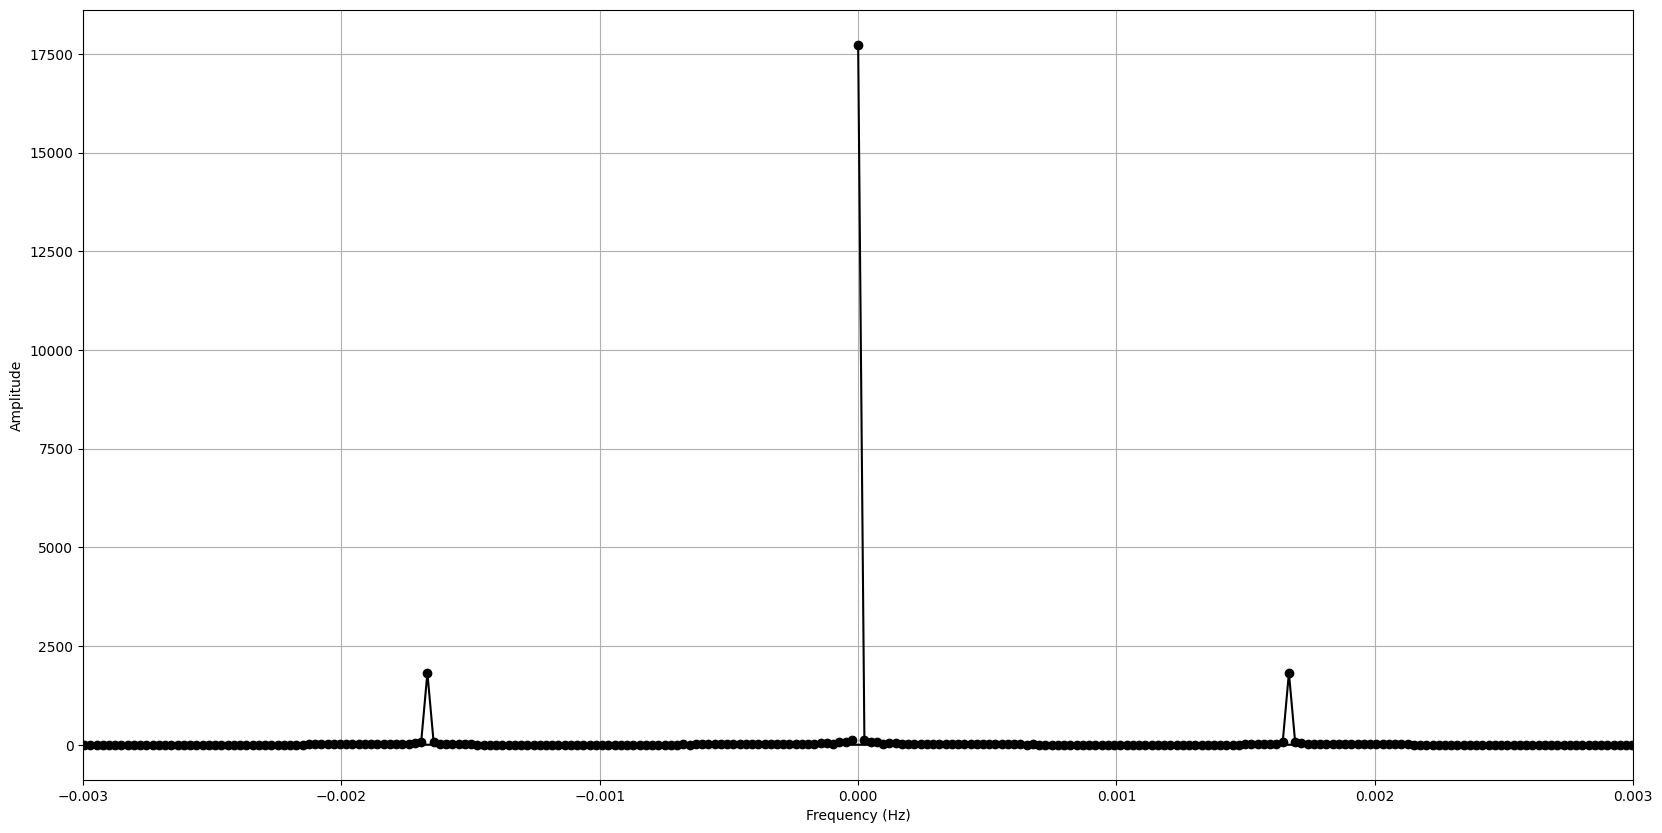

In [14]:
def Oscillation_Frequency(x, y):
    x, y = np.array(x), np.array(y)
    Freq_Amplitudes = np.abs(np.fft.fft(y))
    Freq = np.fft.fftfreq(len(x), x[1]-x[0])
    FFT = {}
    for i in range(len(Freq)):
        FFT[np.abs(Freq_Amplitudes[i])] = Freq[i]
    sorted_list = sorted(FFT.items(), key = lambda x:x[0])
    return Freq, Freq_Amplitudes, FFT[sorted_list[-2][0]]

Freq, Freq_Amplitudes, Frequency = Oscillation_Frequency(Temperatur1_1.t()[2500:], Temperatur1_1.a()[2500:])
print(1/Frequency)
plt.figure(figsize=(20, 10))
plt.plot(Freq, Freq_Amplitudes, 'ko-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([-0.003, 0.003])
plt.show()

In [1]:
from scipy.signal import find_peaks

peaks = find_peaks(Temperatur3_1.a()[2500:], distance=170/2)
ypeaks = np.array([])
for peak in peaks[0]:
    ypeaks = np.append(ypeaks, Temperatur3_1.a()[2500:][peak])

plt.figure(figsize=(16,8))
plt.plot(Temperatur3_1.t()[2500:], Temperatur3_1.a()[2500:])
plt.scatter(peaks[0]*2+2500*2, ypeaks)
plt.show()
peaks

NameError: name 'Temperatur3_1' is not defined

In [6]:
l1 = [1,2,3,4,5]
l2 = [31,32,33,34]
l3 = [l1,l2]
print(l3[0][1])

2
